In [39]:
import piplite
await piplite.install(['openpyxl==3.0.9'])

In [40]:
import numpy as np
import pandas as pd 

In [41]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

df_can = pd.read_excel(
    text,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [42]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [43]:
print(df_can.shape)

(195, 43)


In [44]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [45]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [46]:
all(isinstance(column, str) for column in df_can.columns)

False

In [47]:
df_can.columns = list(map(str, df_can.columns))
all(isinstance(column, str) for column in df_can.columns)

True

In [48]:
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [49]:
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

<ipython-input-49-2e640a54b281>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [50]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [51]:
years = list(map(str, range(1980, 2014)))

In [52]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [53]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


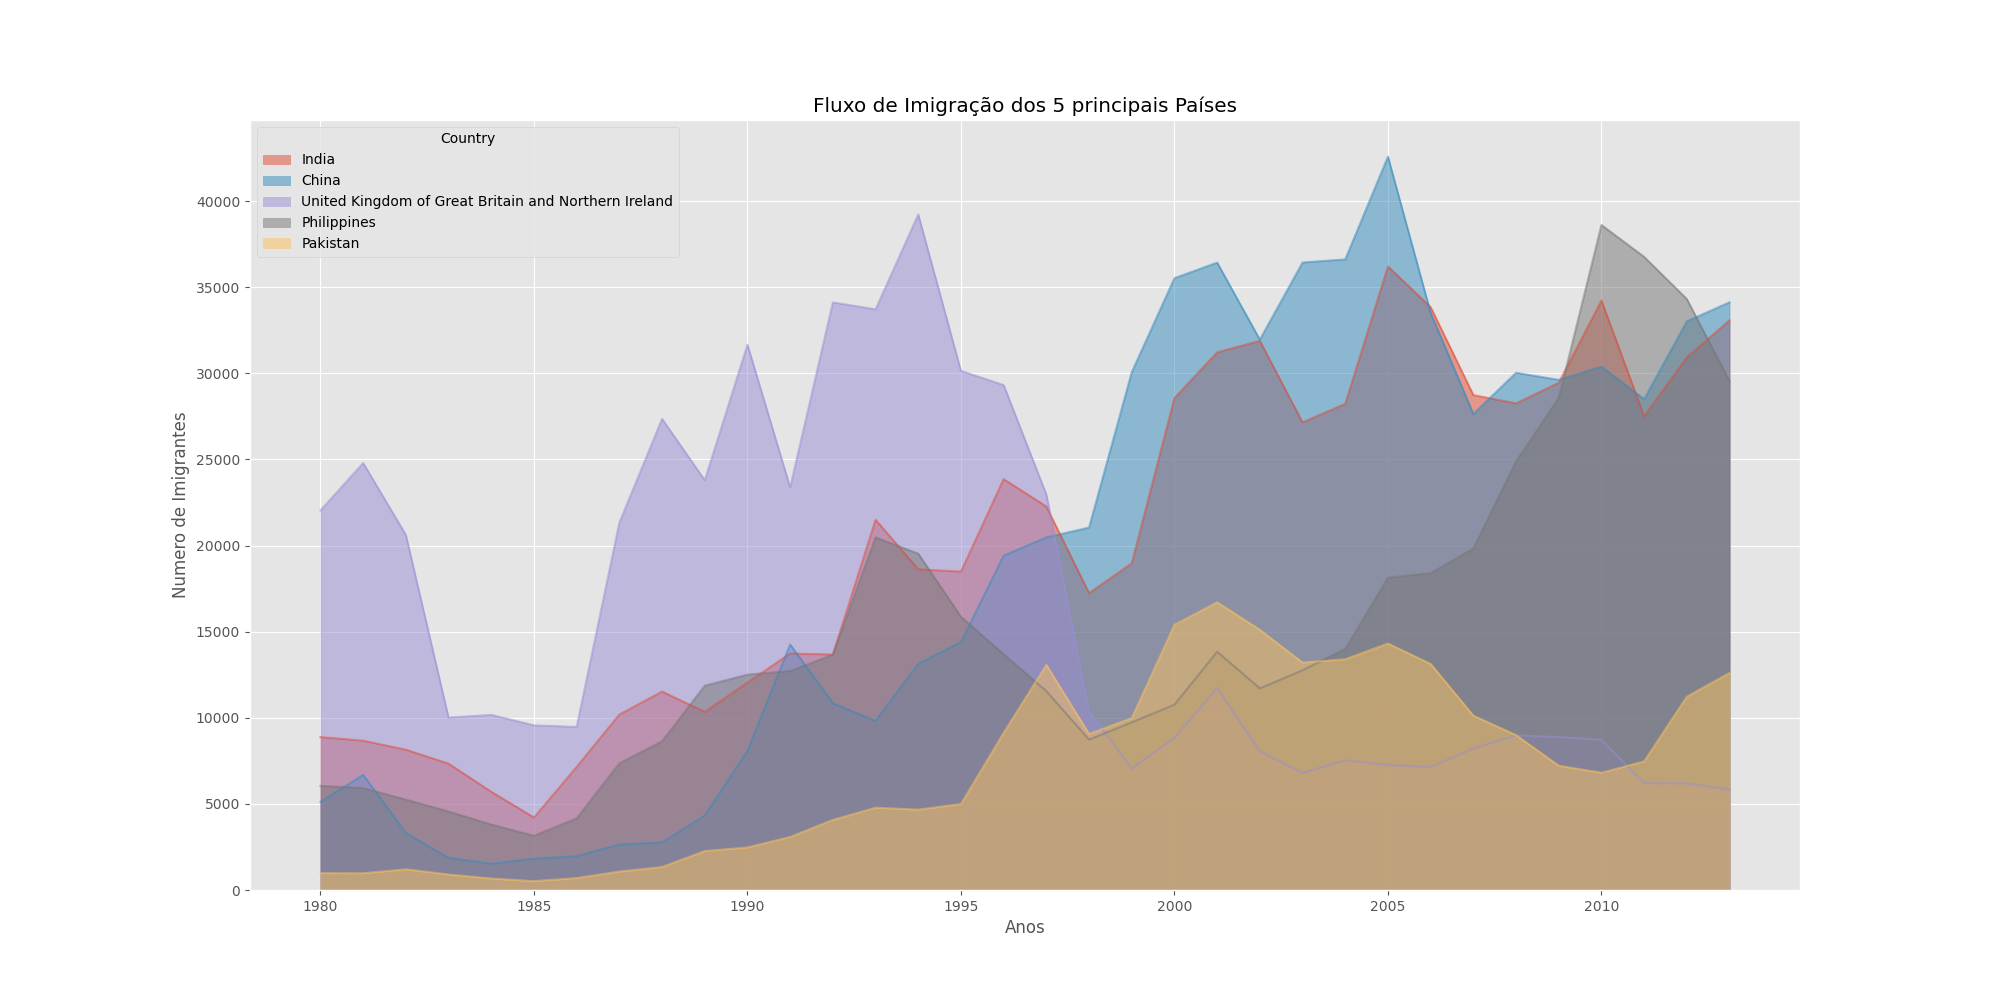

<Figure size 2000x1000 with 0 Axes>

In [54]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10)) 

plt.title('Fluxo de Imigração dos 5 principais Países')
plt.ylabel('Numero de Imigrantes')
plt.xlabel('Anos')

plt.show()

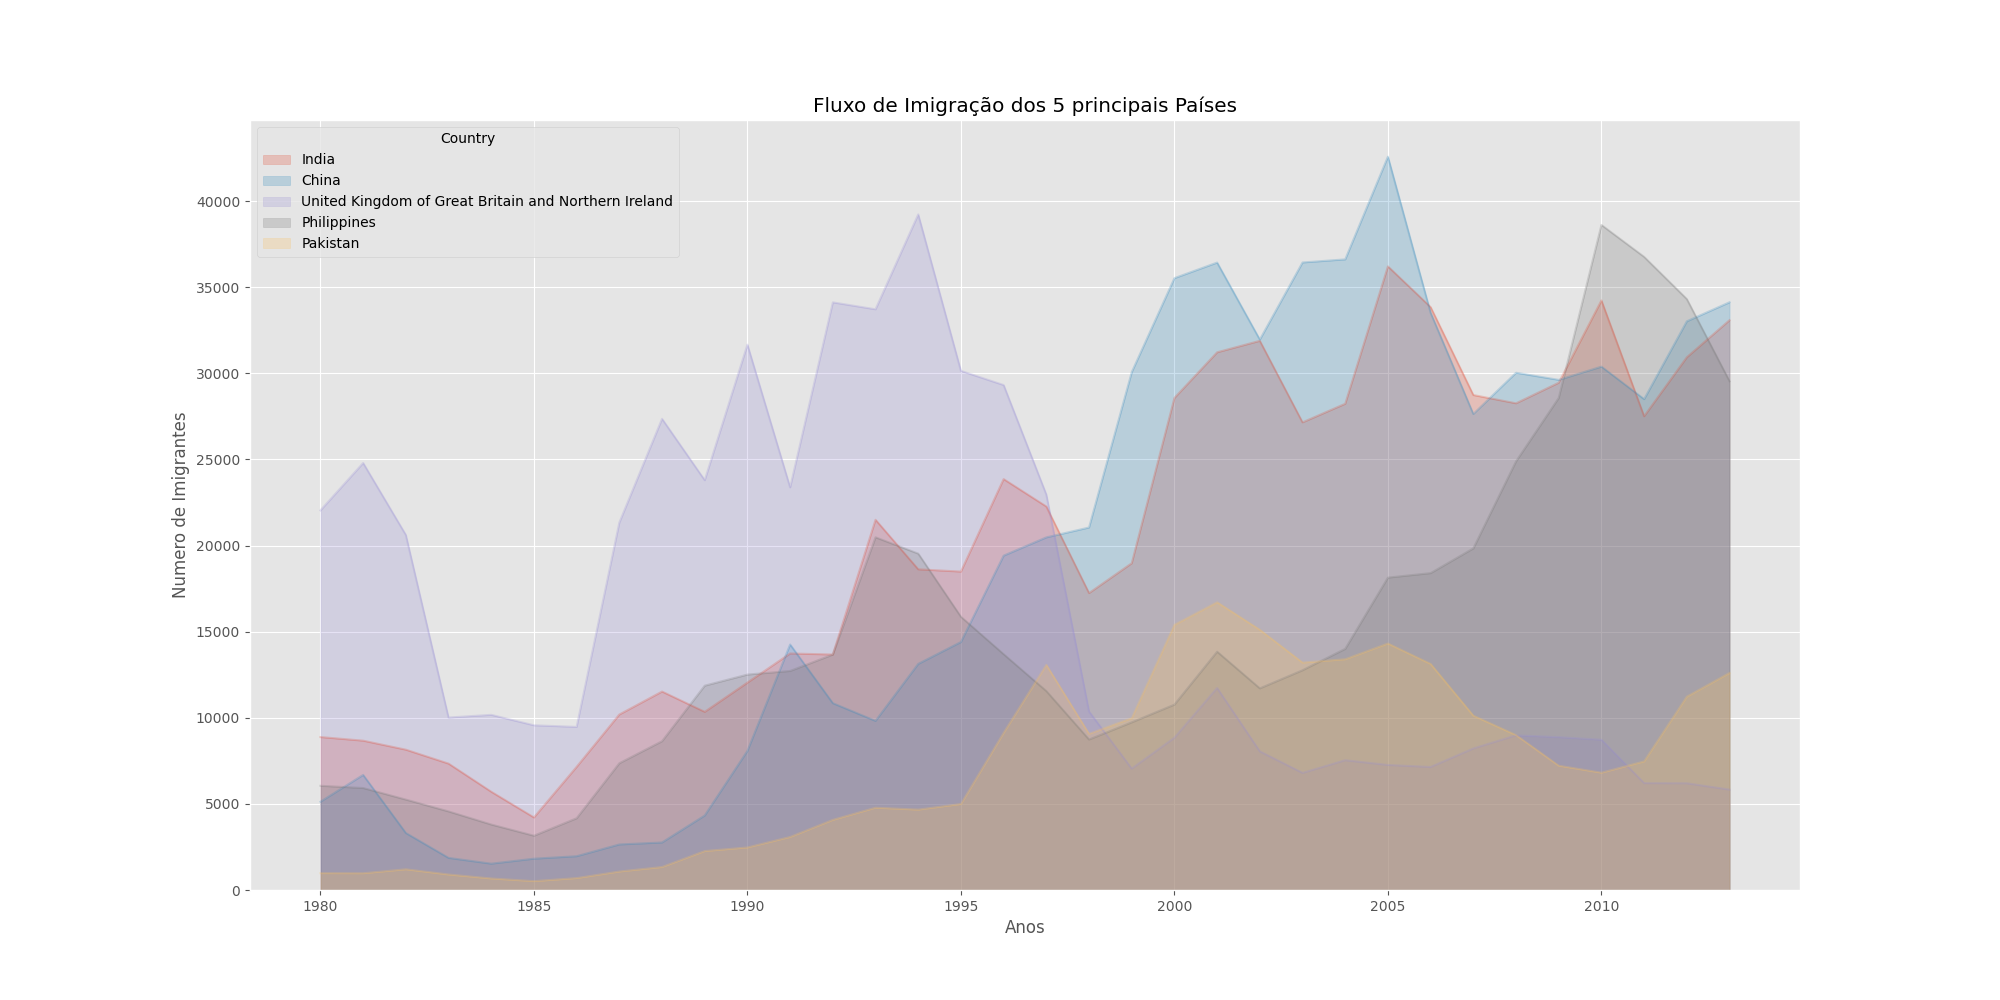

<Figure size 2000x1000 with 0 Axes>

In [55]:
df_top5.plot(kind='area', 
             alpha=0.25, 
             stacked=False,
             figsize=(20, 10))

plt.title('Fluxo de Imigração dos 5 principais Países')
plt.ylabel('Numero de Imigrantes')
plt.xlabel('Anos')

plt.show()

Text(0.5, 0, 'Anos')

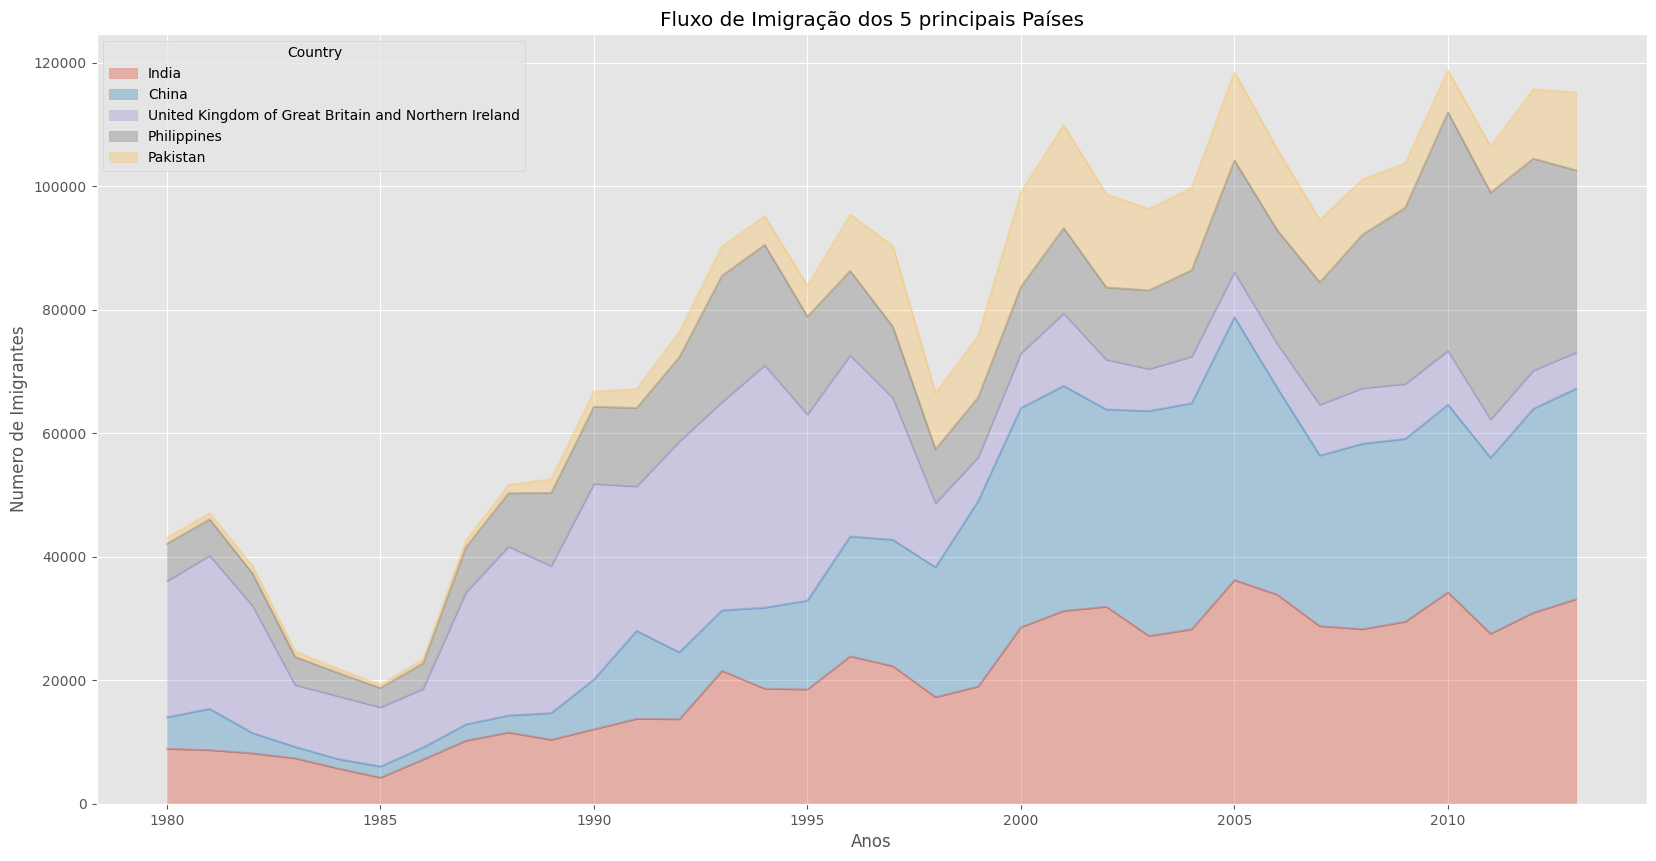

In [56]:
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Fluxo de Imigração dos 5 principais Países')
ax.set_ylabel('Numero de Imigrantes')
ax.set_xlabel('Anos')

In [57]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [26]:
count, bin_edges = np.histogram(df_can['2013'])

print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


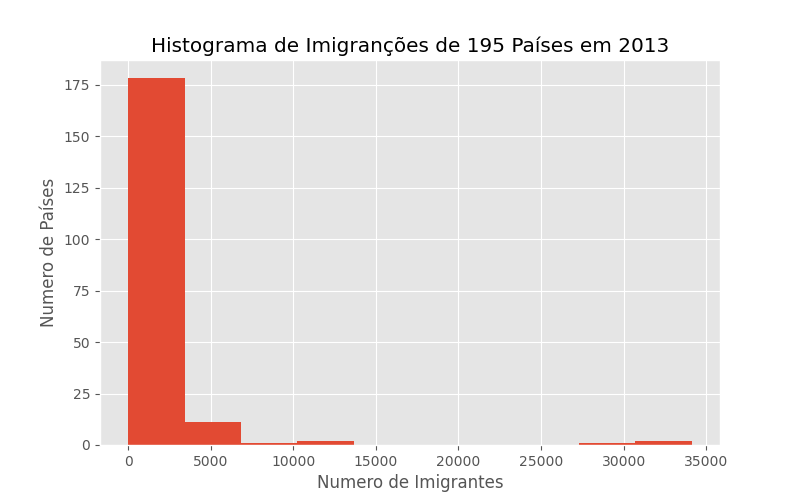

<Figure size 800x500 with 0 Axes>

In [58]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histograma de Imigranções de 195 Países em 2013')
plt.ylabel('Numero de Países')
plt.xlabel('Numero de Imigrantes')

plt.show()

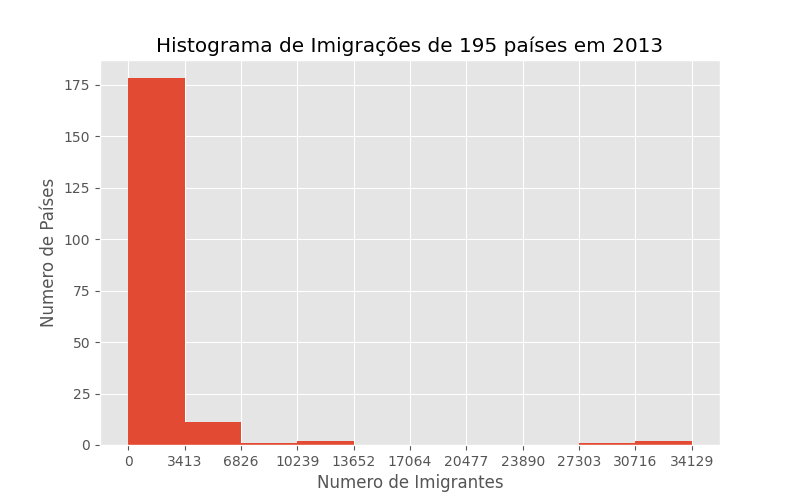

<Figure size 800x500 with 0 Axes>

In [59]:
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histograma de Imigrações de 195 países em 2013') 
plt.ylabel('Numero de Países')
plt.xlabel('Numero de Imigrantes')

plt.show()

In [60]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<AxesSubplot:ylabel='Frequency'>

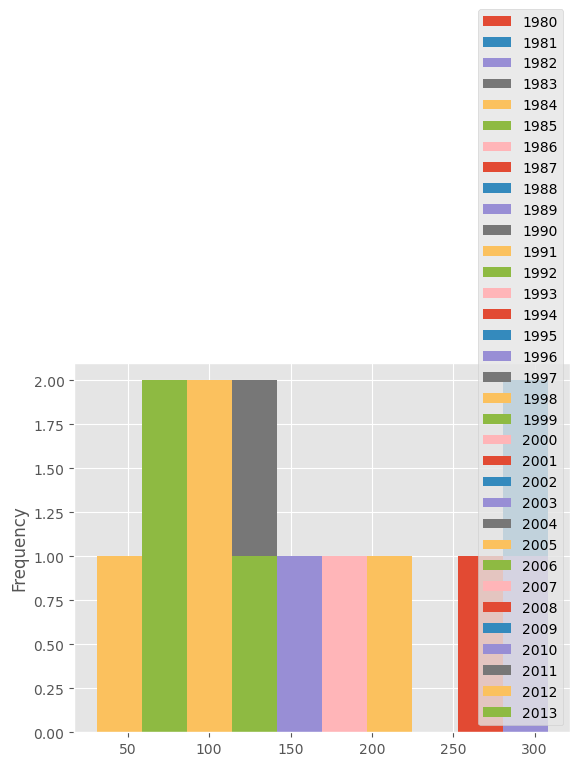

In [61]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [62]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


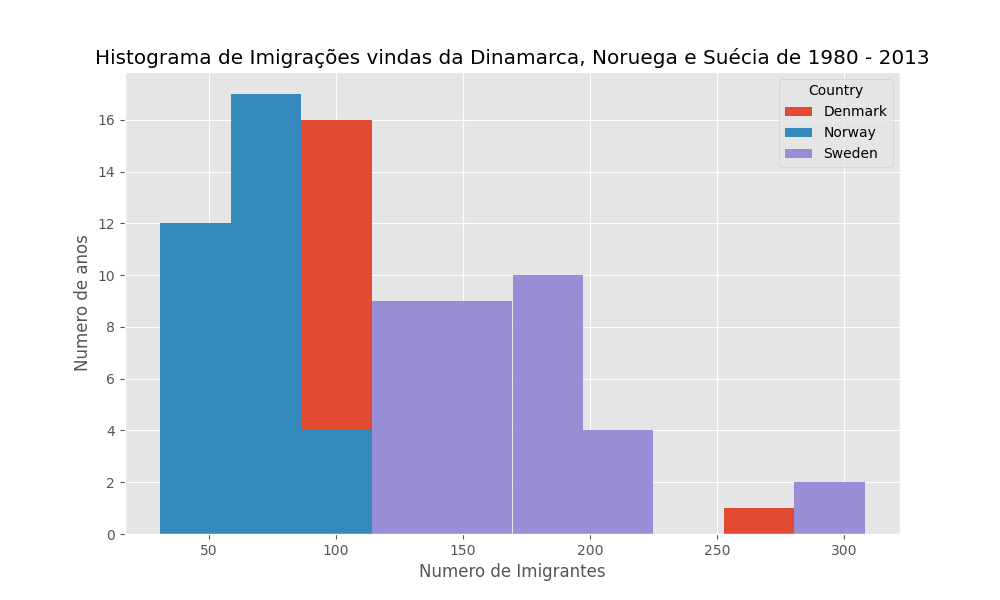

<Figure size 1000x600 with 0 Axes>

In [64]:
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histograma de Imigrações vindas da Dinamarca, Noruega e Suécia de 1980 - 2013')
plt.ylabel('Numero de anos')
plt.xlabel('Numero de Imigrantes')

plt.show()

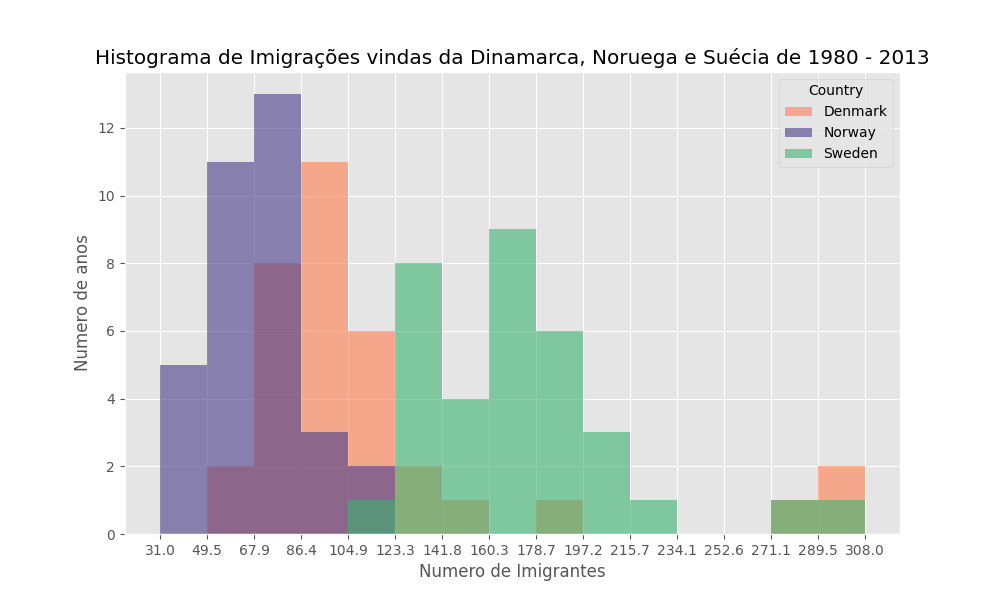

<Figure size 1000x600 with 0 Axes>

In [65]:
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histograma de Imigrações vindas da Dinamarca, Noruega e Suécia de 1980 - 2013')
plt.ylabel('Numero de anos')
plt.xlabel('Numero de Imigrantes')

plt.show()

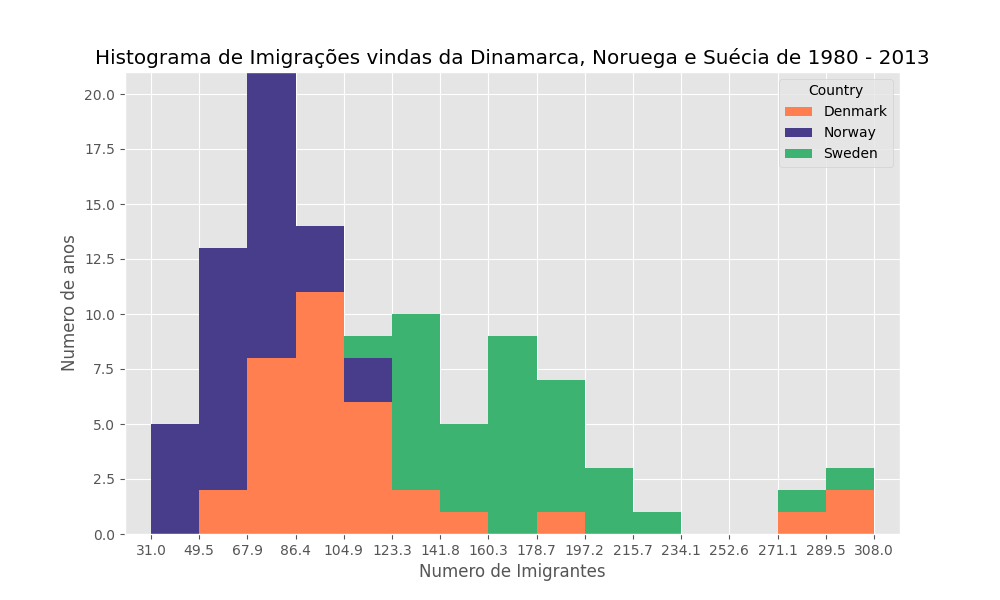

<Figure size 1000x600 with 0 Axes>

In [66]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   
xmax = bin_edges[-1] + 10 

df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histograma de Imigrações vindas da Dinamarca, Noruega e Suécia de 1980 - 2013')
plt.ylabel('Numero de anos')
plt.xlabel('Numero de Imigrantes')

plt.show()

In [68]:
#coletando os dados
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

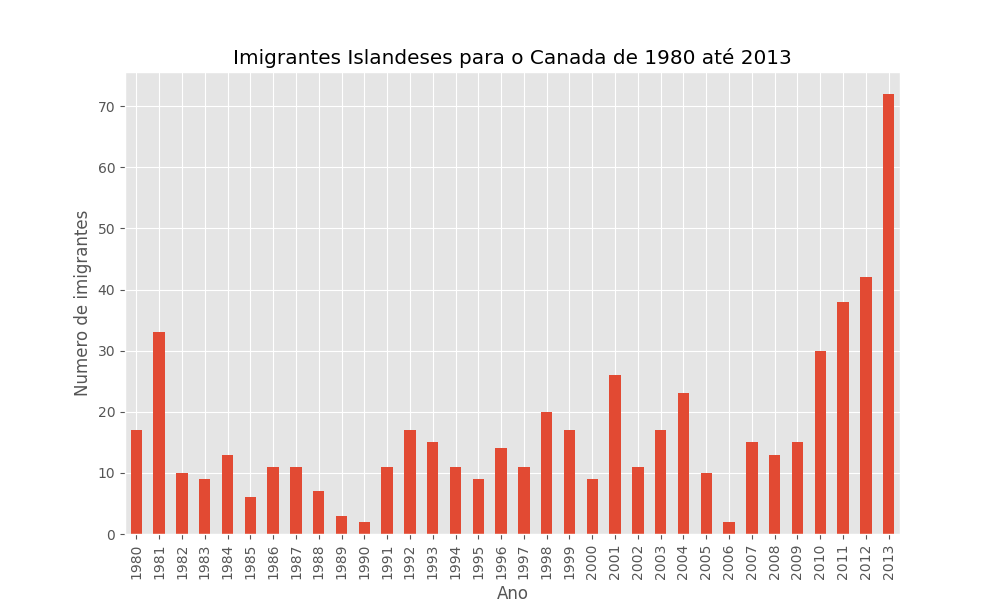

<Figure size 1000x600 with 0 Axes>

In [70]:
#plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Ano')
plt.ylabel('Numero de imigrantes')
plt.title('Imigrantes Islandeses para o Canada de 1980 até 2013') 

plt.show()

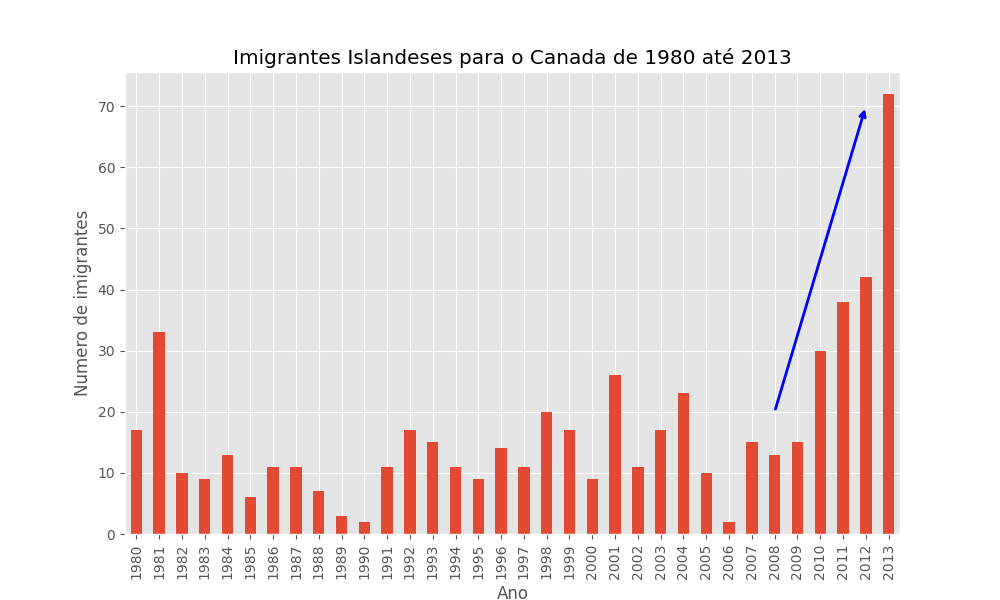

<Figure size 1000x600 with 0 Axes>

In [71]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Ano')
plt.ylabel('Numero de imigrantes')
plt.title('Imigrantes Islandeses para o Canada de 1980 até 2013') 

plt.annotate('', 
             xy=(32, 70), 
             xytext=(28, 20),  
             xycoords='data', 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

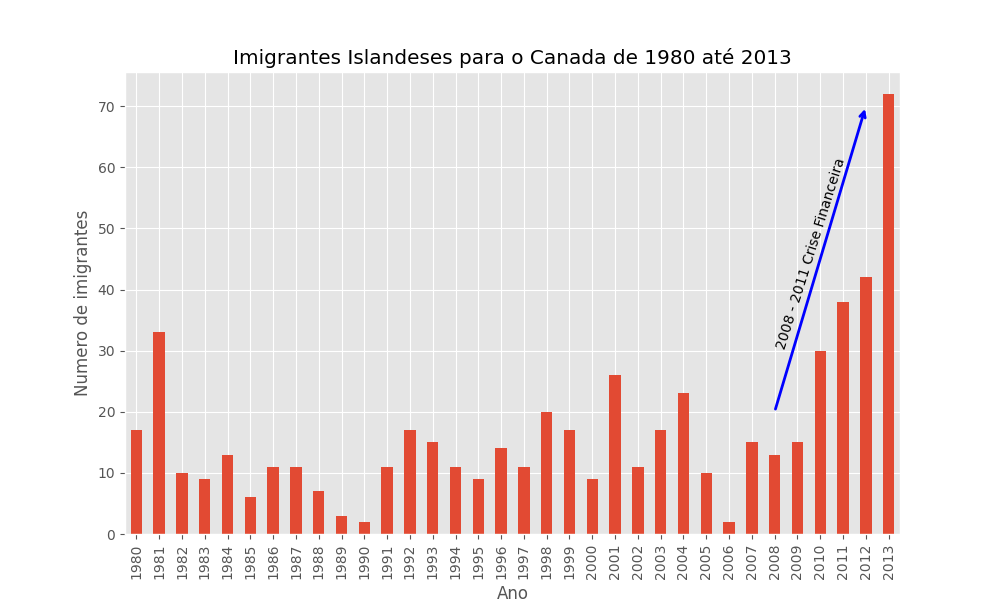

<Figure size 1000x600 with 0 Axes>

In [72]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Ano')
plt.ylabel('Numero de imigrantes')
plt.title('Imigrantes Islandeses para o Canada de 1980 até 2013') 

plt.annotate('',  
             xy=(32, 70),  
             xytext=(28, 20), 
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.annotate('2008 - 2011 Crise Financeira',  
             xy=(28, 30), 
             rotation=72.5,
             va='bottom', 
             ha='left',
             )

plt.show()